Ideas:
- scatter plot AIC vs. R_0

In [ ]:
from ipynb.fs.full.Models import *
download = False

# The Basic Reproductive number
According to a book, the basic reproduction number represents the basic reproductive number represents the average number of secondary infections after introducing one infected to a totally susceptible population.

In [ ]:
#time params
lock_params = ['t_lock', 'beta_lock']
exp_params = ['alpha']
fermi_params = ['alpha', 't_lock']
rational_params = ['alpha']
time_params = [lock_params,exp_params,fermi_params,rational_params]
time_params

[['t_lock', 'beta_lock'], ['alpha'], ['alpha', 't_lock'], ['alpha']]

In [ ]:
country='Italy'
j=c_index[country]
j

0

In [ ]:
def get_model(sirtype_string):
    fname='params/'+sirtype_string+'_models.csv'
    df = pd.read_csv(fname, index_col=0)
    df = df[df.country=='Italy']
    df=df.drop(columns='country')
    df.index=range(len(df))

    fname='params/raw_'+sirtype_string+'_models.csv'
    df_raw = pd.read_csv(fname, index_col=0)
    df_raw = df_raw[df_raw.country=='Italy']
    df_raw = df_raw.drop(columns='country')
    #add column for old AIC
    col = {'oldAIC':['NaN']*len(df_raw)}
    col=pd.DataFrame(col)
    col.index=df_raw.index
    df_raw=pd.concat([col,df_raw],axis=1)
    df_raw.a=[np.nan]*len(df_raw.a)
    df_raw.r=[np.nan]*len(df_raw.a)

    #rearange df in weights order:
    df = df.sort_values('a',axis=0, ascending=False)
    df1 = df[df.a==1.].sort_values('r')
    df1.index = range(len(df1))
    df2 = df[df.a==0.].sort_values('r')
    df2.index = range(len(df1),2*len(df1))
    df = pd.concat([df1,df2])
    df_raw.index=range(2*len(df1),2*len(df1)+len(df_raw))
    df = pd.concat([df, df_raw])

    #fermi beta_0 --> beta(t=0)
    for i in df.index:
        if df.iloc[i].time=='fermi': # calculate 'beta_0 --> beta(t=0) for fermi'
            alpha = df.iloc[i].alpha
            t0 = df.iloc[i].t_lock
            try: #for SIR, SEIAR
                beta=df.iloc[i].beta
                realbeta_0 = beta * 2. / ( 1. + np.exp(alpha*(-t0)) )
                df.at[i,'beta'] = realbeta_0
            except:
                beta_I, beta_A = df.iloc[i].beta_I, df.iloc[i].beta_A
                realbeta_I = beta_I * 2. / ( 1. + np.exp(alpha*(-t0)) )
                realbeta_A = beta_A * 2. / ( 1. + np.exp(alpha*(-t0)) )
    return df

# Calculate $R_0$ for SIR
Doubt: Is beta for fermi really beta(t=0)?

In [ ]:
df = get_model('SIR')
#calculate R_0 for each entry
R_0 = []
for i in df.index:
    R_0.append(df.iloc[i].beta/df.iloc[i].mu) #R0
R_0 = np.array(R_0)
#append 0th column : 'R_0'
R_0=pd.DataFrame(R_0, columns=['R_0'])
df=pd.concat([R_0,df],axis=1)
df

,R_0,oldAIC,AIC,cost,time,a,r,beta,mu,I0,alpha,t_lock,beta_lock
0,3.033844e+11,-1514.24,-2305.790664,1.401786e-03,fermi,1.0,0.0,0.771313,2.542361e-12,1.748827e-10,0.061207,1.972973e-09,NaN
1,2.150742e+03,-1539.27,-2263.001136,1.269338e-03,exp,1.0,0.0,1.211150,5.631315e-04,7.881878e-12,0.057947,NaN,NaN
2,1.367592e+01,-1506.25,-2197.034963,1.463475e-03,rational,1.0,0.0,0.992256,7.255500e-02,1.153529e-11,0.054469,NaN,NaN
3,1.548984e+00,-1134.63,-1967.170209,7.199541e-03,lock,1.0,0.0,0.547070,3.531801e-01,7.847024e-08,NaN,4.500000e+01,0.316250
4,3.277539e+10,-1680.89,-2389.194279,6.893891e-04,exp,1.0,1.0,1.325382,4.043834e-11,2.464128e-12,0.059878,NaN,NaN
5,3.778509e+12,-1638.42,-2352.367257,8.207713e-04,fermi,1.0,1.0,0.766751,2.029243e-13,2.182333e-10,0.061660,3.294176e-09,NaN
6,1.093429e+01,-1587.81,-2350.285826,1.029714e-03,rational,1.0,1.0,0.837801,7.662145e-02,9.262495e-11,0.049054,NaN,NaN
7,1.134868e+00,-1088.49,-2007.409786,8.783397e-03,lock,1.0,1.0,3.756336,3.309931e+00,2.017764e-11,NaN,3.300000e+01,3.297006
8,1.318978e+11,-776.713,-2297.856413,1.133998e-03,fermi,0.0,0.0,0.759832,5.760759e-12,2.055061e-10,0.060908,4.240185e-11,NaN
9,3.103660e+02,-770.477,-2244.071173,1.217436e-03,exp,0.0,0.0,1.156116,3.725007e-03,1.305620e-11,0.056262,NaN,NaN


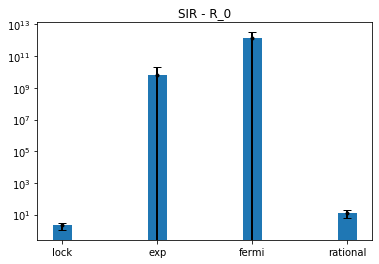

In [ ]:
bar = []
errbar = []
for i, time in enumerate(times):
    bar.append(df[df.time == time].R_0.mean()) 
    errbar.append(df[df.time == time].R_0.std())

x = np.arange(4)
width = 0.2
plt.bar(x,bar, width = width)
plt.errorbar(x, bar, yerr=errbar,fmt='.k',elinewidth=2,capsize=4)
plt.yscale('log')
plt.xticks(x, labels = times)
plt.title('SIR - R_0')
plt.show()

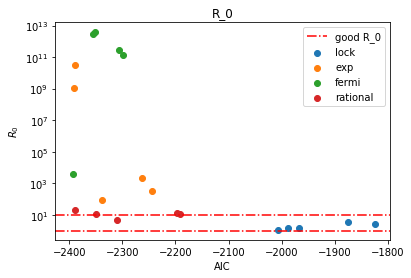

In [ ]:
R0='R_0'
for time in times:
    dftime=df[df.time==time]
    plt.scatter(dftime.AIC, dftime[R0], label=time)
plt.yscale('log')
plt.axhline(y=10, color='r', linestyle='-.',label='good R_0')
plt.axhline(y=1, color='r', linestyle='-.')
plt.legend()
plt.xlabel('AIC')
plt.ylabel(r'$R_0$')
plt.title(R0)
plt.show()

# $R_0$ for SIAR

\begin{align}
<R_0> &= \frac{1}{\beta_A + \beta_I} \left( \frac{\beta_I^2}{\mu_I} + \frac{\beta_A^2 + (\nu/\mu)\beta_I\beta_A}{\mu_A + \nu} + \frac{\beta_A^2}{\mu_A + \nu} \right)
 &\qquad x_0 \text{ - average}\\
R_0 &= \frac{\beta_I}{\mu_I} &\qquad x_0=I\\
R_0 &= \frac{1}{\mu_A + \nu}\left( \beta_A + \frac{\nu \beta_I}{\mu_I} \right) &\qquad x_0=A
\end{align}

In [ ]:
df = get_model('SIAR')
R0_mean, R0_I, R0_A = [],[],[]
for i in df.index:
    beta_I, beta_A = df.iloc[i].beta_I, df.iloc[i].beta_A
    mu_A,mu_I = df.iloc[i].mu_A,df.iloc[i].mu_I
    nu = df.iloc[i].nu
    #R0 types
    r0_mean = 1/(beta_A + beta_I)*(beta_I**2/mu_I + (beta_A**2 + nu/mu_I * beta_I * beta_A)/(mu_A + nu) + beta_A**2/(mu_A + nu))
    r0_I = beta_I/mu_I
    r0_A = 1/(mu_A + nu)*(beta_A + nu*beta_I/mu_I) ###without last beta_A
    
    R0_mean.append(r0_mean)
    R0_I.append(r0_I)
    R0_A.append(r0_A)
R0_mean = pd.DataFrame(R0_mean, columns=['R0_mean'])
R0_I = pd.DataFrame(R0_I, columns=['R0_I'])
R0_A = pd.DataFrame(R0_A, columns=['R0_A'])
df=pd.concat([R0_A,df],axis=1)
df=pd.concat([R0_I,df],axis=1)
df=pd.concat([R0_mean,df],axis=1)
df

,R0_mean,R0_I,R0_A,oldAIC,AIC,cost,time,a,r,beta_I,beta_A,mu_I,mu_A,nu,I0,alpha,t_lock,beta_lock
0,5.727086e+03,1.684623e+05,2.862133e+02,-1532.18,-2274.488192,1.264378e-03,fermi,1.0,0.0,0.532479,15.926310,3.160817e-06,36.077005,0.061209,5.593135e-13,0.058706,2.118160,NaN
1,1.328461e+03,1.346307e+03,7.126507e+02,-1533.11,-2256.767462,1.270225e-03,exp,1.0,0.0,1.182409,0.034267,8.782607e-04,0.310080,0.348627,7.840350e-12,0.057736,NaN,NaN
2,4.119855e+00,5.058819e+00,3.691702e+00,-1501.44,-2195.341182,1.456015e-03,rational,1.0,0.0,0.363611,0.797420,7.187676e-02,0.695916,0.712650,1.272611e-11,0.048943,NaN,NaN
3,9.854982e+00,9.875402e+00,7.293875e+00,-475.162,-1551.915277,1.203829e-01,lock,1.0,0.0,4.410087,0.035163,4.465729e-01,4.881206,13.764167,1.679592e-32,NaN,18.487995,0.259411
4,1.211780e+00,6.245622e-01,1.211891e+00,-1829.59,-2507.599112,3.508603e-04,fermi,1.0,1.0,0.000255,1.348909,4.083750e-04,2.216938,0.018952,9.544178e-11,0.048691,62.420735,NaN
5,4.324519e+01,4.090364e-01,4.349316e+01,-1696.86,-2464.610654,6.270980e-04,rational,1.0,1.0,0.016945,2.927275,4.142765e-02,0.100299,0.034635,3.501001e-19,0.094271,NaN,NaN
6,2.453864e+06,2.554970e+06,9.945393e+05,-1675.83,-2384.535893,6.866096e-04,exp,1.0,1.0,1.284332,0.088982,5.026800e-07,1.274351,0.812206,2.126697e-12,0.059817,NaN,NaN
7,1.499823e+00,1.182499e+00,1.846699e+00,-805.98,-1576.271051,2.892593e-02,lock,1.0,1.0,0.539553,0.493585,4.562822e-01,0.453064,0.226583,1.161193e-08,NaN,18.000275,0.222234
8,1.415790e+00,4.845335e-01,1.423571e+00,-848.137,-2456.383037,5.817578e-04,fermi,0.0,0.0,0.009314,1.114747,1.922163e-02,1.558120,0.012139,1.550618e-10,0.035802,54.340411,NaN
9,2.302333e+00,3.903334e-02,2.304203e+00,-845.923,-2453.632507,6.032777e-04,rational,0.0,0.0,0.001848,2.237701,4.735511e-02,1.919470,0.023201,1.749198e-10,0.013105,NaN,NaN


In [ ]:
#how different are the R_0 types?
delta=[max(abs(df.iloc[i].R0_mean-df.iloc[i].R0_A), abs(df.iloc[i].R0_mean-df.iloc[i].R0_I),abs(df.iloc[i].R0_I-df.iloc[i].R0_A)) for i in df.index]
delta = np.array(delta)
print('time dependencies for which R_0 types deviate at least by 10')
print('')
for i in np.where(delta > 10)[0]:
    print(df.iloc[i].time)

time dependencies for which R_0 types deviate at least by 10

fermi
exp
rational
exp
exp
rational
exp
fermi


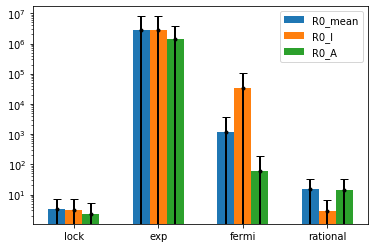

In [ ]:
bar = [[],[],[]]
errbar = [[],[],[]] 
for i, R_0 in enumerate(df.columns[:3]):
    for j, time in enumerate(times):
        bar[i].append(df[df.time == time][R_0].mean()) 
        errbar[i].append(df[df.time == time][R_0].std())

width=0.2
x=np.arange(4)-width
for i, R_0 in enumerate(df.columns[:3]):
    plt.bar(x+i*width,bar[i], width = width, label = R_0)
    plt.errorbar(x+i*width,bar[i], errbar[i],fmt='.k',elinewidth=2,capsize=4)
plt.legend()
plt.yscale('log')
plt.xticks(range(4),labels=times)
plt.show()

For the SIAR the times show very different behavior (huge error bars), i.e. we have good values for every time and every R0

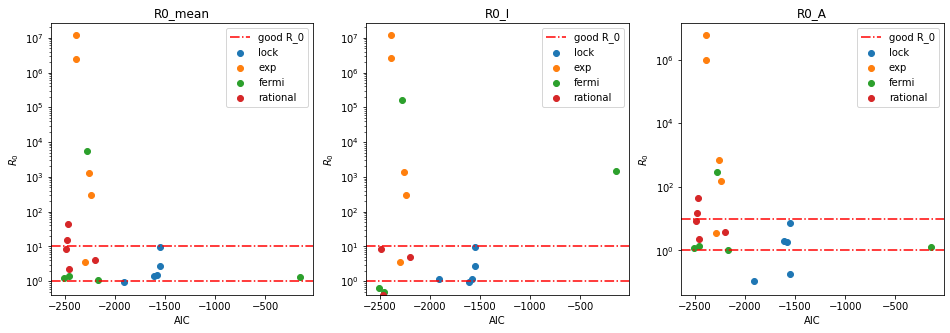

In [ ]:
plt.figure(figsize=(16,5))
for i, R0 in enumerate(df.columns[:3]):
    plt.subplot(1,3,1+i)
    for time in times:
        dftime=df[df.time==time]
        plt.scatter(dftime.AIC, dftime[R0], label=time)
    plt.yscale('log')
    plt.axhline(y=10, color='r', linestyle='-.',label='good R_0')
    plt.axhline(y=1, color='r', linestyle='-.')
    plt.legend()
    plt.xlabel('AIC')
    plt.ylabel(r'$R_0$')
    plt.title(R0)
plt.show()

!!! for some reason the middle plot is shifted after a second evaluation <br>
for all R_0 types, a decay of precision leads to better values

# $R_0$ for SEIAR
\begin{align}
<R_0> &= \beta\left( \frac{p}{\mu_I} + \frac{1-p}{\mu_A} \right) \qquad x_0 \text{ - average}\\
R_0 &= \frac{\beta}{\mu_I} \qquad x_0 = I\\
R_0 &= \frac{\beta}{\mu_A} \qquad x_0 = A
\end{align}

In [ ]:
df = get_model('SEIAR')
R0_mean, R0_I, R0_A = [],[],[]
for i in df.index:
    beta = df.iloc[i].beta
    mu_I, mu_A = df.iloc[i].mu_I, df.iloc[i].mu_A
    p = df.iloc[i].p
    #R_0 types
    r0_mean = beta*(p/mu_I + (1-p)/mu_A)
    r0_I = beta/mu_I
    r0_A = beta/mu_A
    
    R0_mean.append(r0_mean)
    R0_I.append(r0_I)
    R0_A.append(r0_A)
R0_mean = pd.DataFrame(R0_mean, columns=['R0_mean'])
R0_I = pd.DataFrame(R0_I, columns=['R0_I'])
R0_A = pd.DataFrame(R0_A, columns=['R0_A'])
df=pd.concat([R0_A,df],axis=1)
df=pd.concat([R0_I,df],axis=1)
df=pd.concat([R0_mean,df],axis=1)
df

,R0_mean,R0_I,R0_A,oldAIC,AIC,cost,time,a,r,beta,gamma,p,mu_I,mu_A,I0,alpha,t_lock,beta_lock
0,7.961505e+01,8.753398e+01,7.955970e+01,-1540.06,-2357.111814,1.222124e-03,fermi,1.0,0.0,14.675551,0.051404,6.941480e-03,1.676555e-01,0.184460,2.346757e-10,0.096027,0.0,NaN
1,1.525048e+01,6.274906e+01,7.494968e+00,-1544.77,-2341.219653,1.207940e-03,rational,1.0,0.0,2.659209,0.488307,1.403608e-01,4.237848e-02,0.354799,7.971254e-11,0.062978,NaN,NaN
2,2.408297e+07,8.117455e+07,5.358029e-01,-1534.34,-2277.131673,1.263488e-03,exp,1.0,0.0,4.182194,2.370705,2.966813e-01,5.152101e-08,7.805472,6.251696e-12,0.058758,NaN,NaN
3,2.780542e+02,1.555364e+02,4.274261e+02,-702.443,-1742.781570,2.778936e-02,lock,1.0,0.0,12.946772,0.015476,5.493842e-01,8.323949e-02,0.030290,3.356318e-09,NaN,29.0,3.799920e-07
4,1.194424e+00,2.238188e+02,1.042802e+00,-1827.95,-2508.165965,3.564066e-04,rational,1.0,1.0,9.957948,38.550057,6.806033e-04,4.449112e-02,9.549221,7.555107e-12,0.006327,NaN,NaN
5,1.564684e+00,9.342786e+01,1.265968e+00,-1813.37,-2505.758883,3.795244e-04,exp,1.0,1.0,4.754340,8.393677,3.241212e-03,5.088782e-02,3.755497,5.706579e-12,0.006950,NaN,NaN
6,7.034075e+02,1.629464e+03,1.288863e+01,-1408.86,-2486.838396,4.084013e-04,fermi,1.0,1.0,3.883005,0.044980,4.271491e-01,2.382995e-03,0.301274,1.363934e-08,0.160358,28.0,NaN
7,6.357690e+04,1.643493e+01,6.365225e+04,-355.257,-1739.191874,2.327612e-02,lock,1.0,1.0,141.547677,0.014100,1.184186e-03,8.612614e+00,0.002224,8.242785e-17,NaN,23.0,2.572283e-10
8,1.950134e+00,5.050782e+01,1.227179e+00,-846.043,-2450.264698,6.026577e-04,rational,0.0,0.0,2.461270,5.934510,1.467015e-02,4.873048e-02,2.005632,2.014388e-10,0.014814,NaN,NaN
9,4.897268e+01,4.898019e+01,4.796429e+01,-693.898,-2424.829154,6.987839e-04,fermi,0.0,0.0,5.029922,0.049042,9.926083e-01,1.026930e-01,0.104868,6.294880e-09,0.122414,21.0,NaN


In [ ]:
#how different are the R_0 types?
delta=[max(abs(df.iloc[i].R0_mean-df.iloc[i].R0_A), abs(df.iloc[i].R0_mean-df.iloc[i].R0_I),abs(df.iloc[i].R0_I-df.iloc[i].R0_A)) for i in df.index]
delta = np.array(delta)
print('time dependencies for which R_0 types deviate at least by 10')
print('')
for i in np.where(delta > 10)[0]:
    print(df.iloc[i].time)

time dependencies for which R_0 types deviate at least by 10

rational
exp
lock
rational
exp
fermi
lock
rational
exp
lock
rational
fermi
exp
lock
rational
fermi
exp
lock


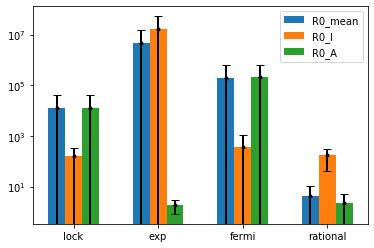

In [ ]:
bar = [[],[],[]]
errbar = [[],[],[]] 
for i, R_0 in enumerate(df.columns[:3]):
    for j, time in enumerate(times):
        bar[i].append(df[df.time == time][R_0].mean()) 
        errbar[i].append(df[df.time == time][R_0].std())

width=0.2
x=np.arange(4)-width
for i, R_0 in enumerate(df.columns[:3]):
    plt.bar(x+i*width,bar[i], width = width, label = R_0)
    plt.errorbar(x+i*width,bar[i], errbar[i],fmt='.k',elinewidth=2,capsize=4)
plt.legend()
plt.yscale('log')
plt.xticks(range(4),labels=times)
plt.show()

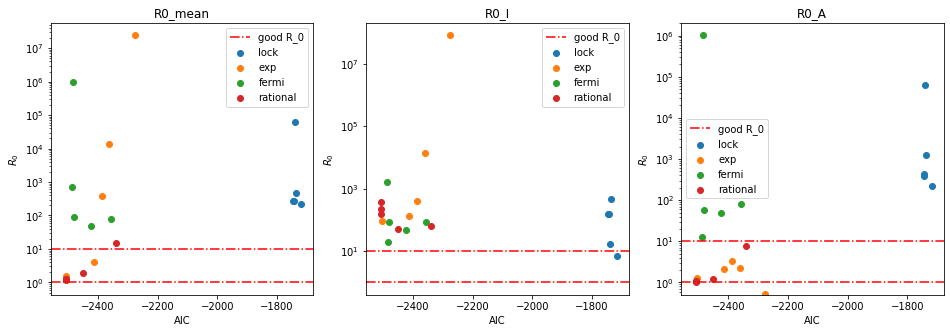

In [ ]:
plt.figure(figsize=(16,5))
for i, R0 in enumerate(df.columns[:3]):
    plt.subplot(1,3,1+i)
    for time in times:
        dftime=df[df.time==time]
        plt.scatter(dftime.AIC, dftime[R0], label=time)
    plt.yscale('log')
    plt.axhline(y=10, color='r', linestyle='-.',label='good R_0')
    plt.axhline(y=1, color='r', linestyle='-.')
    plt.legend()
    plt.xlabel('AIC')
    plt.ylabel(r'$R_0$')
    plt.title(R0)
plt.show()

# Summary
it seems ok to use R0_mean for SIAR and SEIAR

### load R_0s

In [ ]:
#SIR
df = get_model('SIR')
#calculate R_0 for each entry
R_0 = []
for i in df.index:
    R_0.append(df.iloc[i].beta/df.iloc[i].mu) #R0
R_0 = np.array(R_0)
#append 0th column : 'R_0'
R_0=pd.DataFrame(R_0, columns=['R_0'])
df=pd.concat([R_0,df],axis=1)
dfSIR=df

#SIAR
df = get_model('SIAR')
R0_mean, R0_I, R0_A = [],[],[]
for i in df.index:
    beta_I, beta_A = df.iloc[i].beta_I, df.iloc[i].beta_A
    mu_A,mu_I = df.iloc[i].mu_A,df.iloc[i].mu_I
    nu = df.iloc[i].nu
    #R0 types
    r0_mean = 1/(beta_A + beta_I)*(beta_I**2/mu_I + (beta_A**2 + nu/mu_I * beta_I * beta_A)/(mu_A + nu) + beta_A**2/(mu_A + nu))
    r0_I = beta_I/mu_I
    r0_A = 1/(mu_A + nu)*(beta_A + nu*beta_I/mu_I + beta_A)
    
    R0_mean.append(r0_mean)
    R0_I.append(r0_I)
    R0_A.append(r0_A)
R0_mean = pd.DataFrame(R0_mean, columns=['R0_mean'])
R0_I = pd.DataFrame(R0_I, columns=['R0_I'])
R0_A = pd.DataFrame(R0_A, columns=['R0_A'])
df=pd.concat([R0_A,df],axis=1)
df=pd.concat([R0_I,df],axis=1)
df=pd.concat([R0_mean,df],axis=1)
dfSIAR=df

#SEIAR
df = get_model('SEIAR')
R0_mean, R0_I, R0_A = [],[],[]
for i in df.index:
    beta = df.iloc[i].beta
    mu_I, mu_A = df.iloc[i].mu_I, df.iloc[i].mu_A
    p = df.iloc[i].p
    #R_0 types
    r0_mean = beta*(p/mu_I + (1-p)/mu_A)
    r0_I = beta/mu_I
    r0_A = beta/mu_A
    
    R0_mean.append(r0_mean)
    R0_I.append(r0_I)
    R0_A.append(r0_A)
R0_mean = pd.DataFrame(R0_mean, columns=['R0_mean'])
R0_I = pd.DataFrame(R0_I, columns=['R0_I'])
R0_A = pd.DataFrame(R0_A, columns=['R0_A'])
df=pd.concat([R0_A,df],axis=1)
df=pd.concat([R0_I,df],axis=1)
df=pd.concat([R0_mean,df],axis=1)
dfSEIAR = df

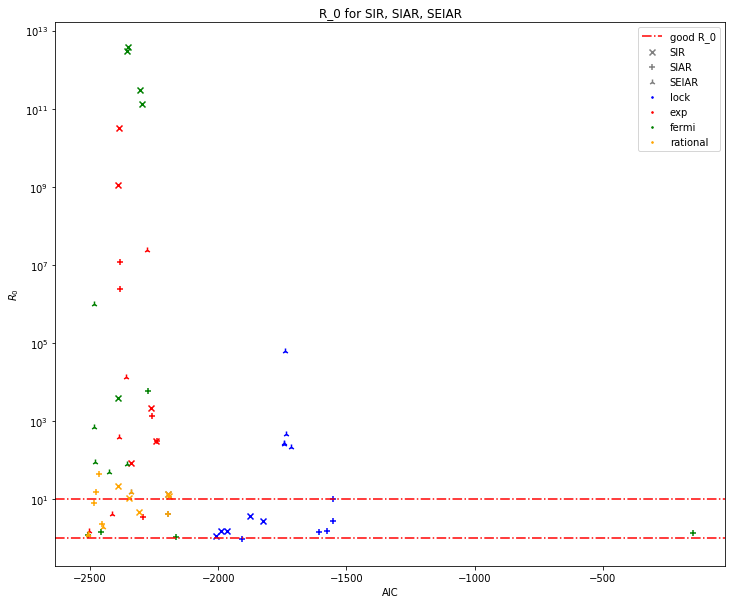

In [ ]:
#SIR, SIAR, SEIAR
plt.figure(figsize=(12,10))
colors = ['b','r','g','orange']
dftime=dfSIR[dfSIR.time==time]
plt.scatter(dftime.iloc[0].AIC, dftime.iloc[0]['R_0'], c='grey', marker='x', label='SIR')

dftime=dfSIAR[dfSIAR.time==time]
plt.scatter(dftime.iloc[0].AIC, dftime.iloc[0]['R0_mean'], c='grey',marker='+', label='SIAR')

dftime=dfSEIAR[dfSEIAR.time==time]
plt.scatter(dftime.iloc[0].AIC, dftime.iloc[0]['R0_mean'], c='grey', marker='2', label='SEIAR')

for i,time in enumerate(times):
    dftime=dfSIR[dfSIR.time==time]
    plt.scatter(dftime.AIC, dftime['R_0'], c=colors[i], marker='.',s=10,label=time)
    plt.scatter(dftime.AIC, dftime['R_0'], c=colors[i], marker='x')
    
    dftime=dfSIAR[dfSIAR.time==time]
    plt.scatter(dftime.AIC, dftime['R0_mean'], c=colors[i],marker='+')
    
    dftime=dfSEIAR[dfSEIAR.time==time]
    plt.scatter(dftime.AIC, dftime['R0_mean'], c=colors[i], marker='2')
    
plt.yscale('log')
plt.axhline(y=10, color='r', linestyle='-.',label='good R_0')
plt.axhline(y=1, color='r', linestyle='-.')
plt.legend()
plt.xlabel('AIC')
plt.ylabel(r'$R_0$')
plt.title('R_0 for SIR, SIAR, SEIAR')
plt.show()